In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Churn_Modelling.csv") 

In [3]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [8]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
def visualization(x,y,xlabel):
    plt.figure(figsize=(8,5))
    plt.hist([x,y], color=['red','green'], label=['exit','not_exit'])
    plt.xlabel(xlabel,fontsize=10)
    plt.ylabel("No.Of Customer",fontsize=10)
    plt.legend()

In [11]:
df_churn_exited=df[df['Exited']==1]['Tenure']
df_churn_not_exited=df[df['Exited']==0]['Tenure']

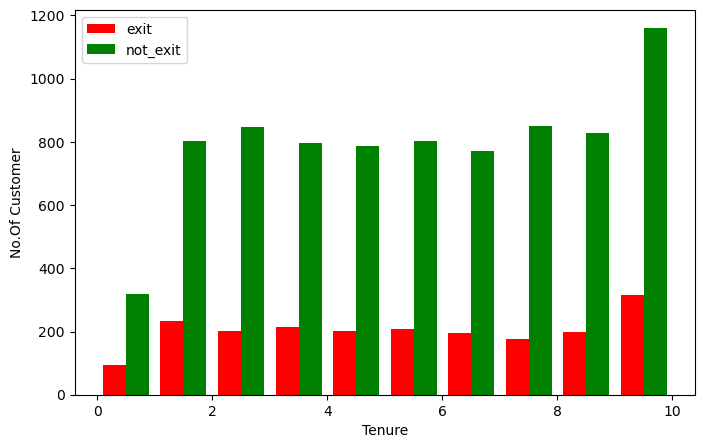

In [12]:
visualization(df_churn_exited,df_churn_not_exited,"Tenure")

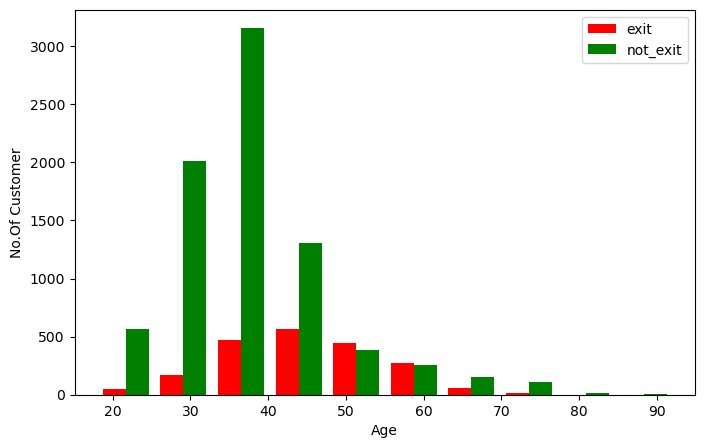

In [13]:
df_churn_exited2=df[df['Exited']==1]['Age']
df_churn_not_exited2=df[df['Exited']==0]['Age']
visualization(df_churn_exited2,df_churn_not_exited2, "Age")

In [14]:
x=df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
states =pd.get_dummies(df['Geography'],drop_first =True)
gender =pd.get_dummies(df['Gender'],drop_first=True)

In [15]:
df=pd.concat([df,gender,states],axis=1)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [17]:
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y=df['Exited']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [19]:
x.shape

(10000, 11)

In [20]:
x_test.shape

(3000, 11)

In [21]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
3780,595,46,5,142360.62,2,1,0,48421.40,True,True,False
7616,610,27,4,87262.40,2,1,0,182720.07,False,False,False
715,786,34,9,0.00,2,1,0,144517.19,True,False,False
9690,846,34,10,142388.61,2,0,1,68393.64,False,False,False
8503,559,48,2,0.00,2,0,1,137961.41,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3022,648,27,7,0.00,2,1,1,163060.43,False,False,True
3362,759,33,9,160541.36,2,0,0,93541.14,False,False,False
5577,592,62,5,0.00,1,1,1,100941.57,False,False,False
3307,572,38,7,0.00,2,1,1,133122.62,False,False,False


In [22]:
x_train.shape

(7000, 11)

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter=100,activation='relu')

In [25]:
ann.fit(x_train,y_train)

C:\Users\DATA ANALYTICS9\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [26]:
y_pred=ann.predict(x_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
import sklearn

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score

In [30]:
y_test.value_counts()

Exited
0    2369
1     631
Name: count, dtype: int64

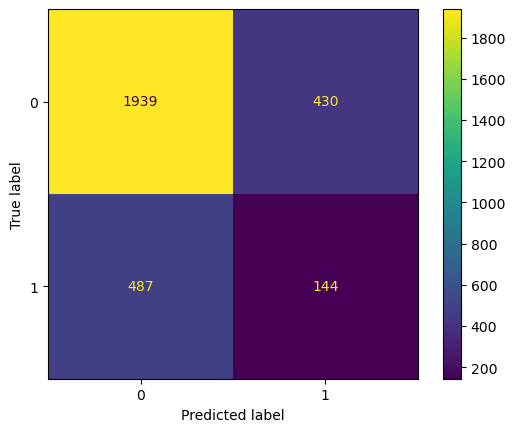

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [32]:
accuracy_score(y_test,y_pred)

0.6943333333333334

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2369
           1       0.25      0.23      0.24       631

    accuracy                           0.69      3000
   macro avg       0.53      0.52      0.52      3000
weighted avg       0.68      0.69      0.69      3000

